In [2]:
import pandas as pd

In [3]:
#PS2_1
Sig_Eqs=pd.read_csv('earthquakes-2021-10-25_16-33-33_+0800.tsv',sep="\t")
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,NaN,2021.0,9.0,21.0,23.0,15.0,53.0,NaN,NaN,AUSTRALIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,1.0
6269,NaN,2021.0,9.0,27.0,6.0,17.0,22.0,NaN,NaN,GREECE,...,NaN,NaN,20.0,1.0,NaN,3.0,772.0,3.0,NaN,NaN
6270,NaN,2021.0,10.0,6.0,22.0,1.0,8.0,NaN,NaN,PAKISTAN,...,NaN,NaN,229.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0
6271,NaN,2021.0,10.0,12.0,9.0,24.0,3.0,5817.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [76]:
Sig_Eqs.groupby(['Country'])['Country'].count()

Country
AFGHANISTAN                             59
ALBANIA                                 56
ALGERIA                                 57
ANTARCTICA                               5
ANTIGUA AND BARBUDA                      3
                                        ..
VENEZUELA                               66
VIETNAM                                  5
WALLIS AND FUTUNA (FRENCH TERRITORY)     1
YEMEN                                   10
ZAMBIA                                   1
Name: Country, Length: 156, dtype: int64

In [4]:
#PS2_1.1
S1=Sig_Eqs.groupby(['Country'])['Deaths'].count()
S1.sort_values(ascending=False).head(10)

Country
CHINA          277
IRAN           187
TURKEY         164
INDONESIA      134
ITALY          119
JAPAN          108
PERU            86
GREECE          77
TAIWAN          66
PHILIPPINES     60
Name: Deaths, dtype: int64

In [10]:
#PS2_1.2 Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year
df1=Sig_Eqs[Sig_Eqs['Mag']>6.0]
df1
S2=df1.groupby(['Year'])['Country'].count()
S2

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2017.0    32
 2018.0    28
 2019.0    27
 2020.0    15
 2021.0    17
Name: Country, Length: 530, dtype: int64

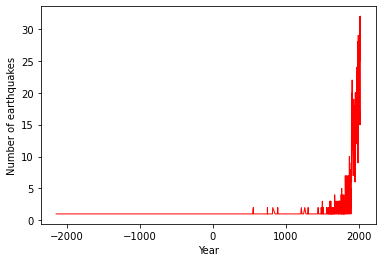

In [11]:
#PS2_1.2 plot the time series
import matplotlib.pyplot as plt
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.plot(S2,color='red',linewidth=1.0)
plt.show()

In [36]:
#PS2_1.2 
# From the graph above, it is obvious that the number of earthquakes with magnitude larger than 6.0 gets higher rapidly in recent years.
# That may be because the data collection is gradually completed in recent years.

In [97]:
#PS2_1.3 Write the function CountEq_LargestEq
def CountEq_LargestEq(aa:str):
    Sig_Eqs=pd.read_csv('earthquakes-2021-10-25_16-33-33_+0800.tsv',sep="\t") 
    mag=Sig_Eqs['Mag'][Sig_Eqs['Country']==aa].max()
    df1=Sig_Eqs[["Year","Mo","Dy"]][(Sig_Eqs['Mag']==mag)&(Sig_Eqs['Country']==aa)]
    return str(aa),Sig_Eqs['Country'][Sig_Eqs['Country']==aa].count(),df1

CountEq_LargestEq('CHINA')

('CHINA',
 610,
        Year   Mo    Dy
 973  1668.0  7.0  25.0)

In [101]:
#PS2_1.3 apply to every country
new=pd.DataFrame(columns=['Country','Mag','date'])
country=[]
for (Country),group in Sig_Eqs[Sig_Eqs['Mag']>0].groupby('Country'):
    country.append(Country)

x=0
for i in country:
    new.loc[str(x)]=[i,CountEq_LargestEq(i)[1],CountEq_LargestEq(i)[2]]
    x+=1
new=new.sort_values('Mag',ascending=False)
new[["Country","Mag"]]

,Country,Mag
25,CHINA,610
66,JAPAN,409
60,INDONESIA,401
61,IRAN,380
131,TURKEY,330
...,...,...
77,MADAGASCAR,1
94,NORWAY,1
97,PALAU,1
110,SIERRA LEONE,1
